In [1]:
import json
import jsmin
from lussac.core import LussacData
import pathlib
import platform
import spikeinterface.core as si
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from typing import Callable, Iterable
import pickle
from python_code.nord_cmap import *


In [2]:
def load_json(filename: str) -> dict:
	"""
	Loads the JSON parameters file and returns its content.

	@param filename: str
		Path to the file containing Lussac's parameters.
	@return params: dict
		Lussac's parameters.
	"""
	folder = pathlib.Path(filename).parent
	with open(filename) as json_file:
		minified = jsmin.jsmin(json_file.read())  # Parses out comments.
		minified = minified.replace("$PARAMS_FOLDER", str(folder.absolute()))
		print(folder.absolute())
		if platform.system() == "Windows":  # pragma: no cover (OS specific).
			minified = minified.replace("\\", "\\\\")

		return json.loads(minified)

In [3]:
graph_labeled = pickle.load(open("/media/andrea/Crucial X6/final_graph_labeled.pkl", 'rb'))

In [4]:
graph_labeled.nodes[('ks2_default', 0)]

{'contamination': 0.0,
 'sd_ratio': 0.8941561100420632,
 'gt_label': '80% > acc >= 50%',
 'gt_neuron': '#679',
 'gt_accuracy': 0.6662269,
 'gt_precision': 0.96576786,
 'gt_recall': 0.6823402}

In [5]:
params = load_json('/media/andrea/Crucial X6/synthetic_MEArec/1h_3000cells/analyses/lussac_params.json')


/media/andrea/Crucial X6/synthetic_MEArec/1h_3000cells/analyses


In [6]:
data = LussacData.create_from_params(params)    

{'ks2_default': '/media/andrea/Crucial X6/synthetic_MEArec/1h_3000cells/analyses/ks2_default/in_container_sorting/provenance.json', 'ks2_pj8-3': '/media/andrea/Crucial X6/synthetic_MEArec/1h_3000cells/analyses/ks2_pj8-3/in_container_sorting/provenance.json', 'ks2_pj6-2.5': '/media/andrea/Crucial X6/synthetic_MEArec/1h_3000cells/analyses/ks2_pj6-2.5/in_container_sorting/provenance.json', 'ks2_5_default': '/media/andrea/Crucial X6/synthetic_MEArec/1h_3000cells/analyses/ks2_5_default/in_container_sorting/provenance.json', 'ks2_5_pj7-3': '/media/andrea/Crucial X6/synthetic_MEArec/1h_3000cells/analyses/ks2_5_pj7-3/in_container_sorting/provenance.json', 'ks3_default': '/media/andrea/Crucial X6/synthetic_MEArec/1h_3000cells/analyses/ks3_default/in_container_sorting/provenance.json', 'ks3_pj7-3': '/media/andrea/Crucial X6/synthetic_MEArec/1h_3000cells/analyses/ks3_pj7-3/in_container_sorting/provenance.json', 'sc_default': '/media/andrea/Crucial X6/synthetic_MEArec/1h_3000cells/analyses/sc_defa

/home/andrea/anaconda3/lib/python3.11/site-packages/spikeinterface/core/base.py:1069: UserWarning:

Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.99.0.dev0 is recommended



/media/andrea/Crucial X6/synthetic_MEArec/1h_3000cells/analyses/ks2_pj6-2.5/in_container_sorting/provenance.json


/home/andrea/anaconda3/lib/python3.11/site-packages/spikeinterface/core/base.py:1069: UserWarning:

Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.99.0.dev0 is recommended



/media/andrea/Crucial X6/synthetic_MEArec/1h_3000cells/analyses/ks2_5_default/in_container_sorting/provenance.json


/home/andrea/anaconda3/lib/python3.11/site-packages/spikeinterface/core/base.py:1069: UserWarning:

Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.99.0.dev0 is recommended



/media/andrea/Crucial X6/synthetic_MEArec/1h_3000cells/analyses/ks2_5_pj7-3/in_container_sorting/provenance.json


/home/andrea/anaconda3/lib/python3.11/site-packages/spikeinterface/core/base.py:1069: UserWarning:

Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.99.0.dev0 is recommended



/media/andrea/Crucial X6/synthetic_MEArec/1h_3000cells/analyses/ks3_default/in_container_sorting/provenance.json


/home/andrea/anaconda3/lib/python3.11/site-packages/spikeinterface/core/base.py:1069: UserWarning:

Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.99.0.dev0 is recommended



/media/andrea/Crucial X6/synthetic_MEArec/1h_3000cells/analyses/ks3_pj7-3/in_container_sorting/provenance.json


/home/andrea/anaconda3/lib/python3.11/site-packages/spikeinterface/core/base.py:1069: UserWarning:

Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.99.0.dev0 is recommended



/media/andrea/Crucial X6/synthetic_MEArec/1h_3000cells/analyses/sc_default/in_container_sorting/provenance.json


/home/andrea/anaconda3/lib/python3.11/site-packages/spikeinterface/core/base.py:1069: UserWarning:

Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.99.0.dev0 is recommended



/media/andrea/Crucial X6/synthetic_MEArec/1h_3000cells/analyses/ms5_default/in_container_sorting/provenance.json

Running Lussac!



In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.cluster import AffinityPropagation, Birch, HDBSCAN, KMeans

In [8]:
best_match = pickle.load(open("/media/andrea/Crucial X6/synthetic_MEArec/best_match.pickle", 'rb'))

In [9]:
best_match

{'ks2_default': array([ 679, 2647, 1502, 1343, 1934,  286, 2704, 2708,   94,  257, 1535,
        2855, 1793, 1099, 1076, 2121, 1945,  700,  168, 1874,  433,  322,
        1407, 1706, 2410, 1680, 2577, 1136, 1078, 1792, 2025, 2127, 1559,
        1792,  555, 1400, 2422, 2581,  517, 2340,  753, 1437, 1956, 1718,
        1732, 2619, 1121, 1732,  148, 1854, 2787,  931, 2795, 2603, 1977,
        1964, 2972, 1354,  839, 1219,  207, 1752, 1060, 1932, 1727, 1545,
        2528,  351, 2209, 1314,  351,  143,  817, 2988, 2158, 1340, 2158,
         157, 1749, 1384,  135, 1749, 1351, 1541, 2428,  864, 2216,  242,
        2350, 2671, 1897, 2671, 1440, 2535, 1158,  698,  935,  935,  159,
        2594, 2425,   55,  944, 2287, 1512, 1512,  794, 2515,  605,  605,
         420, 1258,  261, 2174,  775, 1728, 1728,  332,  332,   92, 1187,
        2602,  503,  689, 2857, 1853, 1853, 1434,  566, 2585, 2901, 2547,
        2793, 1911, 2549,  271, 2604,  253, 2768, 2871, 1794, 2438, 1342,
        1342, 1759,  41

SIMILARITY MATRIX

In [10]:
np.concatenate(list(best_match.values())).shape

(3569,)

In [11]:
def data_truth(graph) -> np.ndarray: 
    """
    data_truth associate each node of the graph to its ground truth label

    Parameters
    ----------
    graph : _type_
        nx.Graph

    Returns
    -------
    np.ndarray
        matched nodes
    """    
    nodes = np.array(graph.nodes)
    matched_nodes = []

    for analyse in params['analyses'] : 
        
        idx = data.sortings[analyse].get_unit_ids()
        match = best_match[analyse]
        analyse_nodes = nodes[nodes[:,0] == analyse]
        
        for i, node in enumerate(idx) : 
            
            if str(node) in analyse_nodes[:,1] : 
            
                matched_nodes.append(np.append(node,[analyse, match[i]]))
                
            else : 
                
                matched_nodes.append(np.append(node,[analyse, -1]))
                
    matched_nodes = np.array(matched_nodes)

    return matched_nodes

In [12]:

graph = pickle.load(open("final_graph_2.pickle", 'rb'))

In [13]:
matched_nodes = data_truth(graph)

In [14]:
matched_nodes

array([['0', 'ks2_default', '679'],
       ['1', 'ks2_default', '2647'],
       ['2', 'ks2_default', '1502'],
       ...,
       ['243', 'ms5_default', '2552'],
       ['244', 'ms5_default', '601'],
       ['245', 'ms5_default', '2783']], dtype='<U21')

In [15]:
np.save("./matched_nodes.npy", matched_nodes)

In [16]:
i,j = 0, 500
dict = graph[(matched_nodes[i, 1], int(matched_nodes[i,0]))][(matched_nodes[j, 1], int(matched_nodes[j,0]))]
dict['cross_contamination']

0.7297670140618284

In [15]:
def extract_data(graph) ->  (np.ndarray, np.ndarray) : 
    
    """
    extract_data extract nodes features from the graph and associate each nodes with his neighbours

    Parameters
    ----------
    graph : _type_
        nx.Graph

    Returns
    -------
    tuple of np.ndarray
        
        extracted features and corresponding link validity
    """    
    
    truth = data_truth(graph)
    n = len(truth)
    data = np.empty((n, n, 4))
    y = np.zeros((n, n))
    for i in tqdm(range(len(truth[:,0]))) :
         
        for j in range(len(truth[:,0])) : 
            
            
            if i == j : 
                
                data[i,j] = [1,0,0,0]
                y[i,j] = 1
                
            else : 
                
                try : 
                    dict = graph[(truth[i, 1], int(truth[i,0]))][(truth[j, 1], int(truth[j,0]))]
                    data[i,j] = [dict['similarity'], dict['corr_diff'], dict['temp_diff'], dict['cross_contamination']]
                    if  dict['cross_contamination'] < 0 : 
                        data[i,j] = [dict['similarity'], dict['corr_diff'], dict['temp_diff'], 0]
                    if truth[i,2] == truth[j,2] : 
                        
                        y[i,j] = 1
                    
                    else : 
                        
                        y[i,j] = 0
                except : 
                    data[i,j] = [0,1,1,1]
                    y[i,j] = 0

    return data, y

In [16]:
data_total, y_total = extract_data(graph)

  0%|          | 0/3569 [00:00<?, ?it/s]

100%|██████████| 3569/3569 [01:01<00:00, 58.44it/s]


In [17]:
data_total.shape

(3569, 3569, 4)

In [67]:
data = data_total.reshape((len(data_total), len(data_total) * 4))

In [68]:
from sklearn.cluster import AffinityPropagation, Birch, HDBSCAN

In [69]:
ap = AffinityPropagation(damping=0.5, max_iter=1000, convergence_iter=15, copy=True, preference=None, affinity='euclidean', verbose=False)
ap.fit(data)

AffinityPropagation(max_iter=1000)

In [81]:
hdb = HDBSCAN(min_cluster_size=2, min_samples=10, cluster_selection_epsilon=0.5, metric='euclidean', cluster_selection_method='eom', allow_single_cluster=True)
hdb.fit(data)


HDBSCAN(allow_single_cluster=True, cluster_selection_epsilon=0.5,
        min_cluster_size=2, min_samples=10)

In [72]:
ap.labels_

array([204, 253,  82, ...,  50, 524, 387])

In [18]:
data_regression= data_total.reshape((len(data_total) ** 2, 4))
y_regression = y_total.reshape((len(y_total) ** 2))

data_regression_test = data_regression[: 2 * len(data_total) // 3]
y_regression_test = y_regression[: 2 * len(data_total) // 3]

data_regression_val = data_regression[2 * len(data_total) // 3 : ]
y_regression_val = y_regression[2 * len(data_total) // 3 : ]

In [19]:
from sklearn.cluster import KMeans

In [33]:
km = KMeans(n_clusters=2, random_state=0).fit(data_regression_test[:, :2])

/home/andrea/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



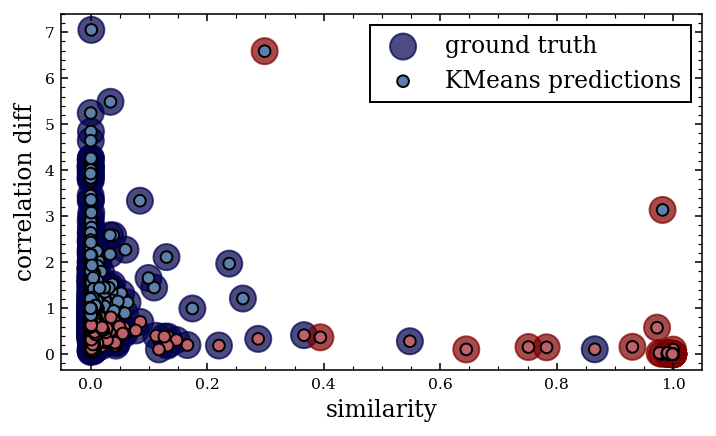

In [63]:
fig, ax = plt.subplots(figsize = (5,3))
plt.style.use('default')
ax.scatter(*data_regression_val[:20000, :2].T, c = y_regression_val[:20000], cmap = 'seismic', s = 180, alpha= .7, label = 'ground truth')

ax.scatter(*data_regression_val[:20000, :2].T, c = km.predict(data_regression_val[:20000, :2]), cmap = cmap1, ec = 'k', alpha = 1, label = 'KMeans predictions')

ax.set_xlabel('similarity', fontsize = 12)
ax.set_ylabel('correlation diff', fontsize = 12)
ax.legend(fontsize = 12)
plt.savefig("/media/andrea/Crucial X6/Master/IMEX/CR/figure/param_space_km.png", dpi = 300, bbox_inches='tight')


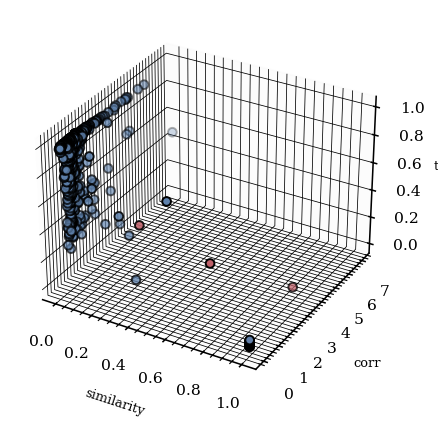

In [31]:
fig, ax = plt.subplots(figsize = (3,3),subplot_kw={'projection': '3d'})

ax.set_xlabel('similarity')
ax.set_ylabel('corr')
ax.set_zlabel('temp')
plt.savefig("/media/andrea/Crucial X6/Master/IMEX/CR/figure/param_space.png", dpi = 300)

In [21]:
from sklearn import svm

In [22]:
data_regression.min()

0.0

In [23]:
clf = svm.SVC(kernel = 'linear')
clf.fit(data_regression_test, y_regression_test)

clf.score(data_regression_val, y_regression_val)

0.9984949018411855

In [24]:
mask = y_regression == 1

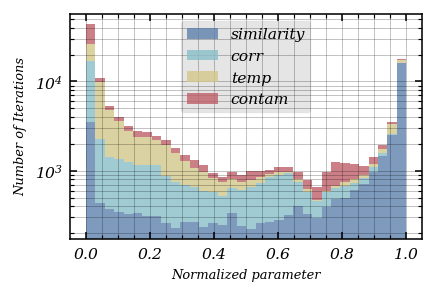

In [25]:
fig, ax = plt.subplots(figsize = (3,2))
color = color_list(4)
ax.hist([data_regression[mask].T[0], data_regression[mask].T[1], data_regression[mask].T[2], data_regression[mask].T[3]], bins = np.linspace(0,1,35), alpha = .8,label = ['similarity', 'corr', 'temp', 'contam'], stacked=True, color = color)

ax.set_yscale('log')
ax.legend()
ax.grid(which='both', alpha=.3)
ax.set_xlabel('Normalized parameter')
ax.set_ylabel('Number of Iterations')
plt.savefig("/media/andrea/Crucial X6/Master/IMEX/CR/figure/param_distrib.png", dpi = 300, bbox_inches='tight')

In [26]:
clf.coef_[0,0]

1.7118479194250937

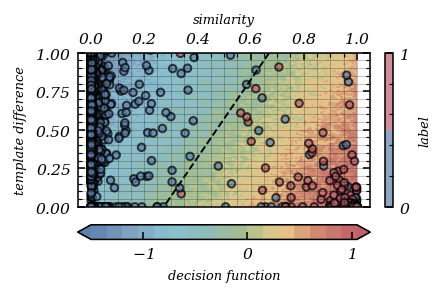

In [27]:
fig, ax = plt.subplots(figsize = (3,2))
X = np.random.uniform((0,0,0,0),(1,.001,1,1),(10000,4))
contour = ax.tricontourf(*X[:,[0,3]].T, clf.decision_function(X), cmap = cmap1, levels = 20, extend='both')
w = clf.coef_[0]
a = -w[0] / w[3]
xx = np.linspace(0, 1)
yy = a * xx - (clf.intercept_[0]) / w[3]
ax.set_ylim(0,1)
ax.plot(xx, yy, 'k--', lw = 1)
scat = ax.scatter(*data_regression[:100000].T[[0,3]], c =y_regression[:100000], cmap = cmap1.resampled(2), ec = 'k', alpha = .7, s = 15)

ax.set_xlabel('similarity')
ax.set_ylabel('template difference')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
ax.grid(which='both', alpha=.3)
plt.colorbar(scat, ax = ax, label = 'label', ticks = [0,1])
plt.colorbar(contour, ax = ax, label = 'decision function', orientation = 'horizontal', ticks = [-1,0,1] ,extendrect = False)
plt.savefig("/media/andrea/Crucial X6/Master/IMEX/CR/figure/decision_function.png", dpi = 300, bbox_inches='tight')


/home/andrea/anaconda3/lib/python3.11/site-packages/mpl_toolkits/mplot3d/art3d.py:1104: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/home/andrea/anaconda3/lib/python3.11/site-packages/mpl_toolkits/mplot3d/art3d.py:1106: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/home/andrea/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.



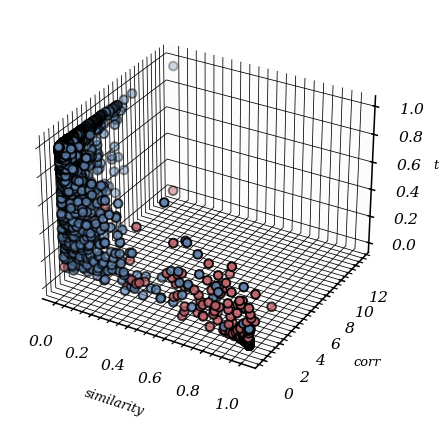

In [28]:
fig, ax = plt.subplots(figsize = (3,6),subplot_kw={'projection': '3d'})

ax.scatter(*data_regression[:100000].T, c =y_regression[:100000], cmap = cmap1, ec = 'k')
ax.set_xlabel('similarity')
ax.set_ylabel('corr')
ax.set_zlabel('temp')
plt.savefig("/media/andrea/Crucial X6/Master/IMEX/CR/figure/param_space_2.png", dpi = 300, bbox_inches='tight')

/home/andrea/anaconda3/lib/python3.11/site-packages/mpl_toolkits/mplot3d/art3d.py:1104: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/home/andrea/anaconda3/lib/python3.11/site-packages/mpl_toolkits/mplot3d/art3d.py:1106: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/home/andrea/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.



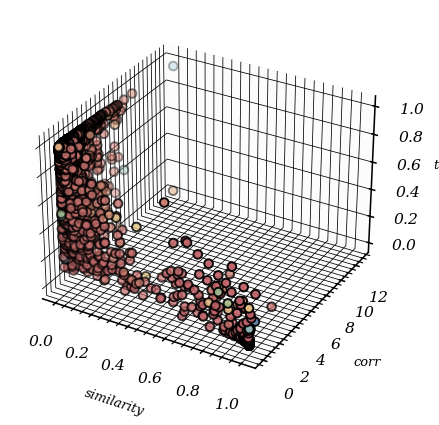

In [29]:
fig, ax = plt.subplots(figsize = (3,6),subplot_kw={'projection': '3d'})

ax.scatter(*data_regression[:100000].T, c = clf.decision_function(data_regression[:100000]), cmap = cmap1, ec = 'k')
ax.set_xlabel('similarity')
ax.set_ylabel('corr')
ax.set_zlabel('temp')
plt.savefig("/media/andrea/Crucial X6/Master/IMEX/CR/figure/param_space.png", dpi = 300, bbox_inches='tight')

In [ ]:
y_regression = clf.predict(data_regression)
y_reshape = y_regression.reshape((len(y_total), len(y_total)))
clusters_ = np.argwhere(y_reshape == 1)

clusters = []

for k in range(len(y_reshape)) : 
    
    clusters.append(clusters_[clusters_[:,0] == k][:,1])

In [73]:
def neighboors(arr) : 
        
        ng = [np.arange(len(arr))[arr == arr[k]] for k in range(len(arr))]
        
        return ng

ng_true = neighboors(matched_nodes[:,2])

In [82]:
ng_pred = neighboors(hdb.labels_)

In [83]:
cluster_cardinal_pred = np.array([len(ng_pred[k]) for k in range(len(ng_pred))])
cluster_cardinal_true = np.array([len(ng_true[k]) for k in range(len(ng_true))])

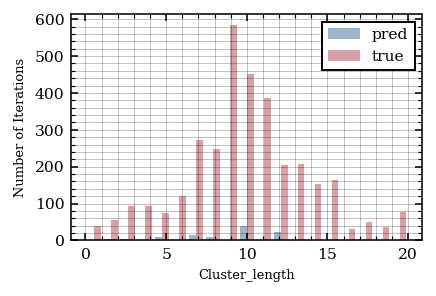

In [84]:
fig, ax = plt.subplots(figsize = (3,2))
color = color_list(2)

ax.hist([cluster_cardinal_pred, cluster_cardinal_true], bins = np.linspace(0,20,20),alpha = .6, label = ['pred', 'true'], color = color)

ax.legend()
ax.grid(which='both', alpha=.3)
ax.set_xlabel('Cluster_length')
ax.set_ylabel('Number of Iterations')
plt.savefig("/media/andrea/Crucial X6/Master/IMEX/CR/figure/cluster_length_hdbs.png", dpi = 300, bbox_inches='tight')

In [85]:
metrics = np.mean([len(list(set(ng_pred[k]) & set(ng_true[k])))/ min(len(ng_true[k]), len(ng_pred[k])) for k in range(len(ng_pred))])

In [86]:
metrics

0.7858708991736572

In [35]:
cluster_cardinal_true = np.array([len(ng_true[k]) for k in range(len(ng_true))])

In [36]:
graph.nodes()

NodeView((('ks2_default', 0), ('ks2_default', 1), ('ks2_default', 2), ('ks2_default', 3), ('ks2_default', 4), ('ks2_default', 5), ('ks2_default', 6), ('ks2_default', 7), ('ks2_default', 8), ('ks2_default', 9), ('ks2_default', 10), ('ks2_default', 11), ('ks2_default', 12), ('ks2_default', 13), ('ks2_default', 14), ('ks2_default', 15), ('ks2_default', 16), ('ks2_default', 17), ('ks2_default', 18), ('ks2_default', 19), ('ks2_default', 20), ('ks2_default', 21), ('ks2_default', 22), ('ks2_default', 23), ('ks2_default', 24), ('ks2_default', 25), ('ks2_default', 26), ('ks2_default', 27), ('ks2_default', 28), ('ks2_default', 29), ('ks2_default', 30), ('ks2_default', 31), ('ks2_default', 32), ('ks2_default', 33), ('ks2_default', 34), ('ks2_default', 35), ('ks2_default', 36), ('ks2_default', 37), ('ks2_default', 38), ('ks2_default', 39), ('ks2_default', 40), ('ks2_default', 41), ('ks2_default', 42), ('ks2_default', 43), ('ks2_default', 44), ('ks2_default', 45), ('ks2_default', 46), ('ks2_default

In [91]:
def clusters_metrics(clusters) : 
    clusters_m = []
    cluster_sd_ratio = []
    for i,cluster in enumerate(clusters) : 
        acc_list = []
        sd = []
        for j,node in enumerate(cluster) : 
            
            nd = (matched_nodes[node][1], int(matched_nodes[node][0]))
            acc = graph_labeled.nodes[nd]['gt_accuracy']
            acc_list.append(acc)
                
            sd.append(graph_labeled.nodes[nd]['sd_ratio'])
        clusters_m.append(acc_list)
        cluster_sd_ratio.append(sd)
    
    return clusters_m, cluster_sd_ratio
        
        

In [92]:
clusters_m, cluster_sd = clusters_metrics(np.array(ng_true, dtype = object))

In [18]:
np.concatenate(cluster_sd).max()

6.062093358151809

In [87]:
import pandas as pd
analyses_metrics = pd.read_pickle("/media/andrea/Crucial X6/Master/IMEX/codes/data_nodes.pkl")

In [20]:
analyses_metrics

,num_spikes,firing_rate,presence_ratio,snr,isi_violations_ratio,isi_violations_count,rp_contamination,rp_violations,sliding_rp_violation,amplitude_cutoff,amplitude_median,sync_spike_2,sync_spike_4,sync_spike_8
0,15687.0,4.357500,1.0,2.805877,0.000000,0.0,0.000000,0.0,0.010,NaN,17.5,0.065596,0.000000,0.0
1,38137.0,10.593611,1.0,11.535462,0.000000,0.0,0.000000,0.0,0.005,NaN,70.0,0.071532,0.000026,0.0
2,14908.0,4.141111,1.0,11.112219,0.005399,1.0,0.008132,1.0,0.020,NaN,66.0,0.072847,0.000134,0.0
3,22085.0,6.134722,1.0,11.877765,0.000000,0.0,0.000000,0.0,0.005,NaN,103.0,0.074394,0.000136,0.0
4,26491.0,7.358611,1.0,3.491609,0.006840,4.0,0.010313,4.0,0.015,NaN,31.0,0.066362,0.000075,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,17001.0,4.722500,1.0,4.813608,0.000000,0.0,0.000000,0.0,0.010,NaN,42.0,0.026998,0.000000,0.0
242,22419.0,6.227500,1.0,3.954758,0.000000,0.0,0.000000,0.0,0.010,NaN,35.0,0.028101,0.000000,0.0
243,58043.0,16.123056,1.0,4.507840,0.000000,0.0,0.000000,0.0,0.005,NaN,39.5,0.027325,0.000000,0.0
244,9906.0,2.751667,1.0,4.221182,0.000000,0.0,0.000000,0.0,0.025,NaN,36.0,0.032405,0.000000,0.0


In [46]:
ng_true[1]

array([   1,  411,  856, 1360, 1766, 2297, 2299, 2742, 3122, 3328])

In [88]:
def weighting_function(node,max) : 
    
    if node == max : 
        return 1
    else : 
        weights = (np.tanh(-(node - max / 4))/2 + 1/2)**2
        weights = weights / (np.tanh(-(0 - max / 4))/2 + 1/2)**2
        return weights

0.11398846119573028

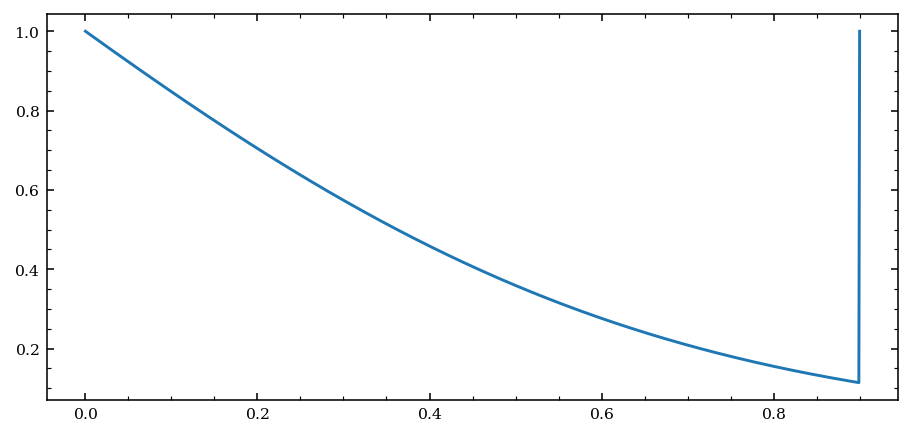

In [89]:
x = np.linspace(0,.9,1000)
y = [weighting_function(i,.9) for i in x]
plt.plot(x,y)
min(y)

In [89]:
score = []

In [93]:
coeffs = np.linspace(3,6,4)
for coeff in tqdm(coeffs) : 

   def weighting_function(node,max) : 
        
      if node == max : 
         return 1
      else : 
         weights = (np.tanh(-(node - max / coeff))/4 + 1/2)**2
         weights = weights / (np.tanh(-(0 - max / coeff))/4+ 1/2)**2
         return weights
        
   y_cluster = []
   y_weights = []
   X_cluster = []

   for i, cluster in enumerate(clusters_m) : 
      if np.max(cluster) <= .3: # relative to accuracy
         
         y_cluster.append([0 for node in cluster])
         y_weights.append([1 for node in cluster])
         data_cluster = np.array(analyses_metrics.iloc[ng_true[i]][['rp_contamination', 'snr', 'sync_spike_2', 'sync_spike_4','firing_rate', 'score_aur']])
         data_cluster = np.insert(data_cluster, 6, cluster_sd[i], axis = 1)
         if 0 in np.std(data_cluster, axis = 0) : 
            X_cluster.append(data_cluster)
         else : X_cluster.append((data_cluster - data_cluster.mean(axis = 0)) / data_cluster.std(axis = 0))
      else : 
         y_cluster.append([0 if node != np.max(cluster) else 1 for node in cluster])
         y_weights.append([weighting_function(node, np.max(cluster))  for node in cluster])
         data_cluster = np.array(analyses_metrics.iloc[ng_true[i]][['rp_contamination', 'snr', 'sync_spike_2', 'sync_spike_4','firing_rate', 'score_aur']])
         data_cluster = np.insert(data_cluster, 6, cluster_sd[i], axis = 1)
         if 0 in np.std(data_cluster, axis = 0) : 
            X_cluster.append(data_cluster)
         else : 
            data_cluster = (data_cluster - data_cluster.mean(axis = 0)) / data_cluster.std(axis = 0)
            X_cluster.append(data_cluster)
            
   y_cluster = np.array(y_cluster, dtype = object)
   mask = np.concatenate(y_cluster) == 1
   true_weights = np.empty_like(np.concatenate(y_weights))
   true_weights[mask] = np.concatenate(y_weights)[mask]  * 5.11548191
   true_weights[~mask] = np.concatenate(y_weights)[~mask] * 0.55416552

   clf2 = svm.SVC(gamma = .003,class_weight = 'balanced', C = 15)
   clf2.fit(np.concatenate(X_cluster), np.concatenate(y_cluster), sample_weight = np.concatenate(y_weights))

   score.append(clf2.score(np.concatenate(X_cluster), np.concatenate(y_cluster), sample_weight = (true_weights/ true_weights.max())))
   
   

  0%|          | 0/4 [00:00<?, ?it/s]

KeyError: "['score_aur'] not in index"

In [66]:
np.save("./score.npy", score)

In [68]:
coeffs = np.concatenate([np.linspace(1,3, 10), np.linspace(3,6, 4)])

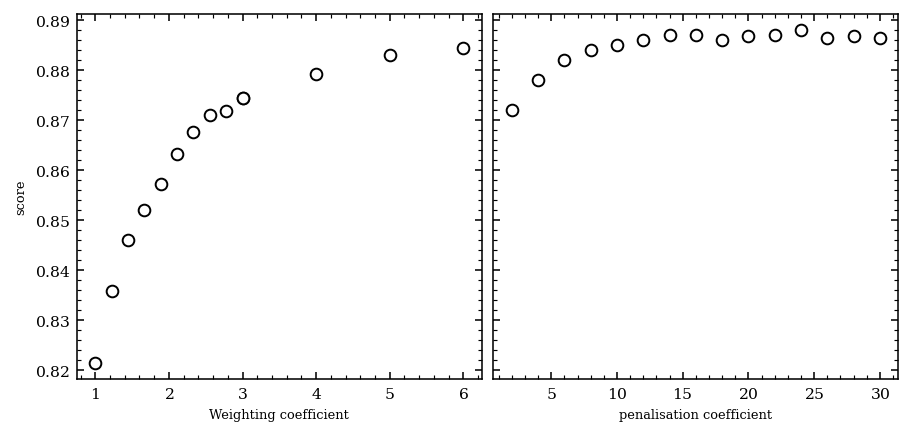

In [85]:
fig, ax = plt.subplots(1,2, sharey=True)
ax[0].plot(coeffs, score, lw = 0, marker = 'o', mec = 'k', mew = 1, mfc = 'white')
ax[0].set_xlabel('Weighting coefficient')
ax[0].set_ylabel('score')
C = np.linspace(2,30, 15)
score2 = [.872, .878, .882, .884, .885, .886, .887, .887, .886, .8868, .887, .888, .8865, .8868, .8864]
ax[1].plot(C, score2, lw = 0, marker = 'o', mec = 'k', mew = 1, mfc = 'white')
ax[1].set_xlabel('penalisation coefficient')
plt.savefig('../CR/figure/score.png', dpi = 300)

In [94]:
analyses_metrics['score_aur'] = analyses_metrics['firing_rate'] * (1 - 2 * analyses_metrics['rp_contamination']) 

In [23]:
analyses_metrics

,num_spikes,firing_rate,presence_ratio,snr,isi_violations_ratio,isi_violations_count,rp_contamination,rp_violations,sliding_rp_violation,amplitude_cutoff,amplitude_median,sync_spike_2,sync_spike_4,sync_spike_8,score_aur
0,15687.0,4.357500,1.0,2.805877,0.000000,0.0,0.000000,0.0,0.010,NaN,17.5,0.065596,0.000000,0.0,4.357500
1,38137.0,10.593611,1.0,11.535462,0.000000,0.0,0.000000,0.0,0.005,NaN,70.0,0.071532,0.000026,0.0,10.593611
2,14908.0,4.141111,1.0,11.112219,0.005399,1.0,0.008132,1.0,0.020,NaN,66.0,0.072847,0.000134,0.0,4.073759
3,22085.0,6.134722,1.0,11.877765,0.000000,0.0,0.000000,0.0,0.005,NaN,103.0,0.074394,0.000136,0.0,6.134722
4,26491.0,7.358611,1.0,3.491609,0.006840,4.0,0.010313,4.0,0.015,NaN,31.0,0.066362,0.000075,0.0,7.206834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,17001.0,4.722500,1.0,4.813608,0.000000,0.0,0.000000,0.0,0.010,NaN,42.0,0.026998,0.000000,0.0,4.722500
242,22419.0,6.227500,1.0,3.954758,0.000000,0.0,0.000000,0.0,0.010,NaN,35.0,0.028101,0.000000,0.0,6.227500
243,58043.0,16.123056,1.0,4.507840,0.000000,0.0,0.000000,0.0,0.005,NaN,39.5,0.027325,0.000000,0.0,16.123056
244,9906.0,2.751667,1.0,4.221182,0.000000,0.0,0.000000,0.0,0.025,NaN,36.0,0.032405,0.000000,0.0,2.751667


In [167]:
np.mean(np.concatenate(cluster_sd))

1.4400629296387084

In [97]:
y_cluster = []
y_weights = []
X_cluster = []

for i, cluster in enumerate(clusters_m) : 
   if np.max(cluster) <= .3: # relative to accuracy
      
      y_cluster.append([0 for node in cluster])
      y_weights.append([1 for node in cluster])
      data_cluster = np.array(analyses_metrics.iloc[ng_true[i]][['rp_contamination', 'snr', 'sync_spike_2', 'sync_spike_4','firing_rate', 'score_aur']])
      data_cluster = np.insert(data_cluster, 6, cluster_sd[i], axis = 1)
      if 0 in np.std(data_cluster, axis = 0) : 
         X_cluster.append(data_cluster)
      else : X_cluster.append((data_cluster - data_cluster.mean(axis = 0)) / data_cluster.std(axis = 0))
   else : 
      y_cluster.append([0 if node != np.max(cluster) else 1 for node in cluster])
      y_weights.append([weighting_function(node, np.max(cluster))  for node in cluster])
      data_cluster = np.array(analyses_metrics.iloc[ng_true[i]][['rp_contamination', 'snr', 'sync_spike_2', 'sync_spike_4','firing_rate', 'score_aur']])
      data_cluster = np.insert(data_cluster, 6, cluster_sd[i], axis = 1)
      if 0 in np.std(data_cluster, axis = 0) : 
         X_cluster.append(data_cluster)
      else : 
         data_cluster = (data_cluster - data_cluster.mean(axis = 0)) / data_cluster.std(axis = 0)
         X_cluster.append(data_cluster)
         

(array([271.,  35.,  17.,  33.,   0.,  49.,   5.,  34.,  17.,  19.,  45.,
         27., 106.,  26.,  41.,  44.,  39.,  76.,  98., 115.,  79., 129.,
        153.,  59., 231., 101., 119., 174., 290., 105., 173., 170., 150.,
        113., 144.,  57.,  46.,  80.,  99.]),
 array([0.        , 0.02564103, 0.05128205, 0.07692308, 0.1025641 ,
        0.12820513, 0.15384615, 0.17948718, 0.20512821, 0.23076923,
        0.25641026, 0.28205128, 0.30769231, 0.33333333, 0.35897436,
        0.38461538, 0.41025641, 0.43589744, 0.46153846, 0.48717949,
        0.51282051, 0.53846154, 0.56410256, 0.58974359, 0.61538462,
        0.64102564, 0.66666667, 0.69230769, 0.71794872, 0.74358974,
        0.76923077, 0.79487179, 0.82051282, 0.84615385, 0.87179487,
        0.8974359 , 0.92307692, 0.94871795, 0.97435897, 1.        ]),
 <BarContainer object of 39 artists>)

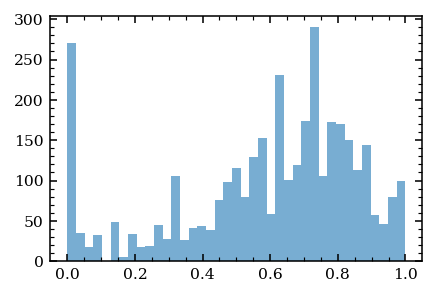

In [25]:
fig, ax = plt.subplots(figsize = (3,2))
ax.hist([np.mean(cluster) for cluster in clusters_m], bins = np.linspace(0,1,40), alpha = .6, label = 'max')

In [99]:
y_cluster = np.array(y_cluster, dtype = object)

In [100]:
u, counts = np.unique(np.concatenate(y_cluster), return_counts = True)

In [101]:
mask = np.concatenate(y_cluster) == 1
true_weights = np.empty_like(np.concatenate(y_weights))
true_weights[mask] = np.concatenate(y_weights)[mask]  * 5.11548191
true_weights[~mask] = np.concatenate(y_weights)[~mask] * 0.55416552

In [102]:
from sklearn import svm

In [103]:
np.concatenate(X_cluster).shape

(40443, 7)

In [104]:
clf2 = svm.SVC(gamma = .1,class_weight = 'balanced', C = 25)
clf2.fit(np.concatenate(X_cluster)[:,[0,5]], np.concatenate(y_cluster), sample_weight = np.concatenate(y_weights))

In [52]:
clf2.class_weight_

array([0.55339208, 5.18234239])

NameError: name 'true_weights' is not defined

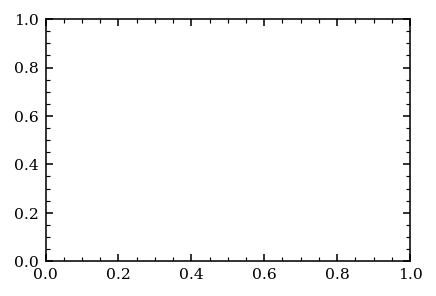

In [98]:
fig, ax = plt.subplots(figsize = (3,2))
X = np.random.uniform((-1,0),(1,20),(10000,2))

scat = ax.scatter(np.concatenate(X_cluster)[:,2], np.concatenate(X_cluster)[:,5],s = true_weights , c = np.concatenate(y_cluster), cmap = cmap1)

ax.xaxis.tick_top()
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.xaxis.set_label_position('top') 
# plt.savefig("/media/andrea/Crucial X6/Master/IMEX/CR/figure/clusters_weights.png", dpi = 300, bbox_inches='tight')

In [133]:
from sklearn.mixture import GaussianMixture
gauss = GaussianMixture(n_components = 2, covariance_type = 'diag')
gauss.fit(np.concatenate(X_cluster)[:,[0,5]])

GaussianMixture(covariance_type='diag', n_components=2)

In [134]:
x,y = np.mgrid[-5:5:.01, -5:5:.01]
Z = gauss.predict(np.c_[x.ravel(), y.ravel()]).reshape(x.shape)



In [135]:
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

(-5.0, 5.0)

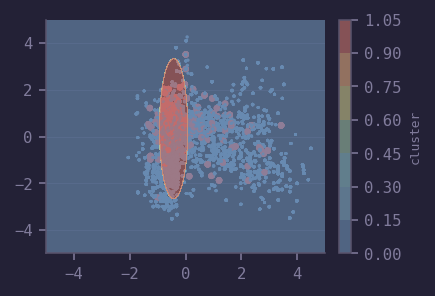

In [136]:
fig,ax = plt.subplots(figsize = (3,2))
scat = ax.scatter(np.concatenate(X_cluster)[:,0], np.concatenate(X_cluster)[:,5],s = true_weights , c = np.concatenate(y_cluster), cmap = cmap1)
surf = ax.contourf(x,y,Z, cmap = cmap1, alpha = .6)
plt.colorbar(surf, ax = ax, label = 'cluster')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

In [149]:
from sklearn.gaussian_process import GaussianProcessClassifier
gauss = GaussianProcessClassifier(n_jobs=-1)
gauss.fit(np.concatenate(X_cluster)[:,[0,5]], np.concatenate(y_cluster))

: 

(-5.0, 5.0)

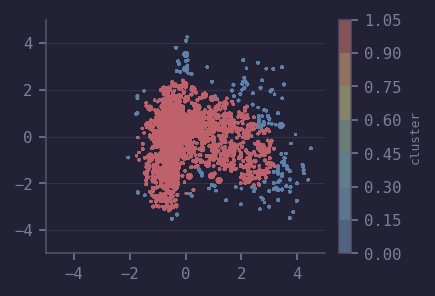

In [147]:
fig,ax = plt.subplots(figsize = (3,2))
scat = ax.scatter(np.concatenate(X_cluster)[:,0], np.concatenate(X_cluster)[:,5],s = true_weights , c = np.concatenate(y_cluster), cmap = cmap1)
scat = ax.scatter(np.concatenate(X_cluster)[:,0], np.concatenate(X_cluster)[:,5],s = true_weights , c = label, cmap = cmap1)

plt.colorbar(surf, ax = ax, label = 'cluster')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

In [238]:
np.concatenate(X_cluster).shape

(40443, 7)

In [148]:
import seaborn as sns
df = pd.DataFrame(np.concatenate(X_cluster), columns = ['rp_contamination', 'snr', 'sync_spike_2', 'sync_spike_4','firing_rate', 'score_aur', 'sd_ratio'])


In [149]:
df['labels'] = np.concatenate(y_cluster)

In [145]:
import seaborn as sns

/home/andrea/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/andrea/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/andrea/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/andrea/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/andrea/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprec

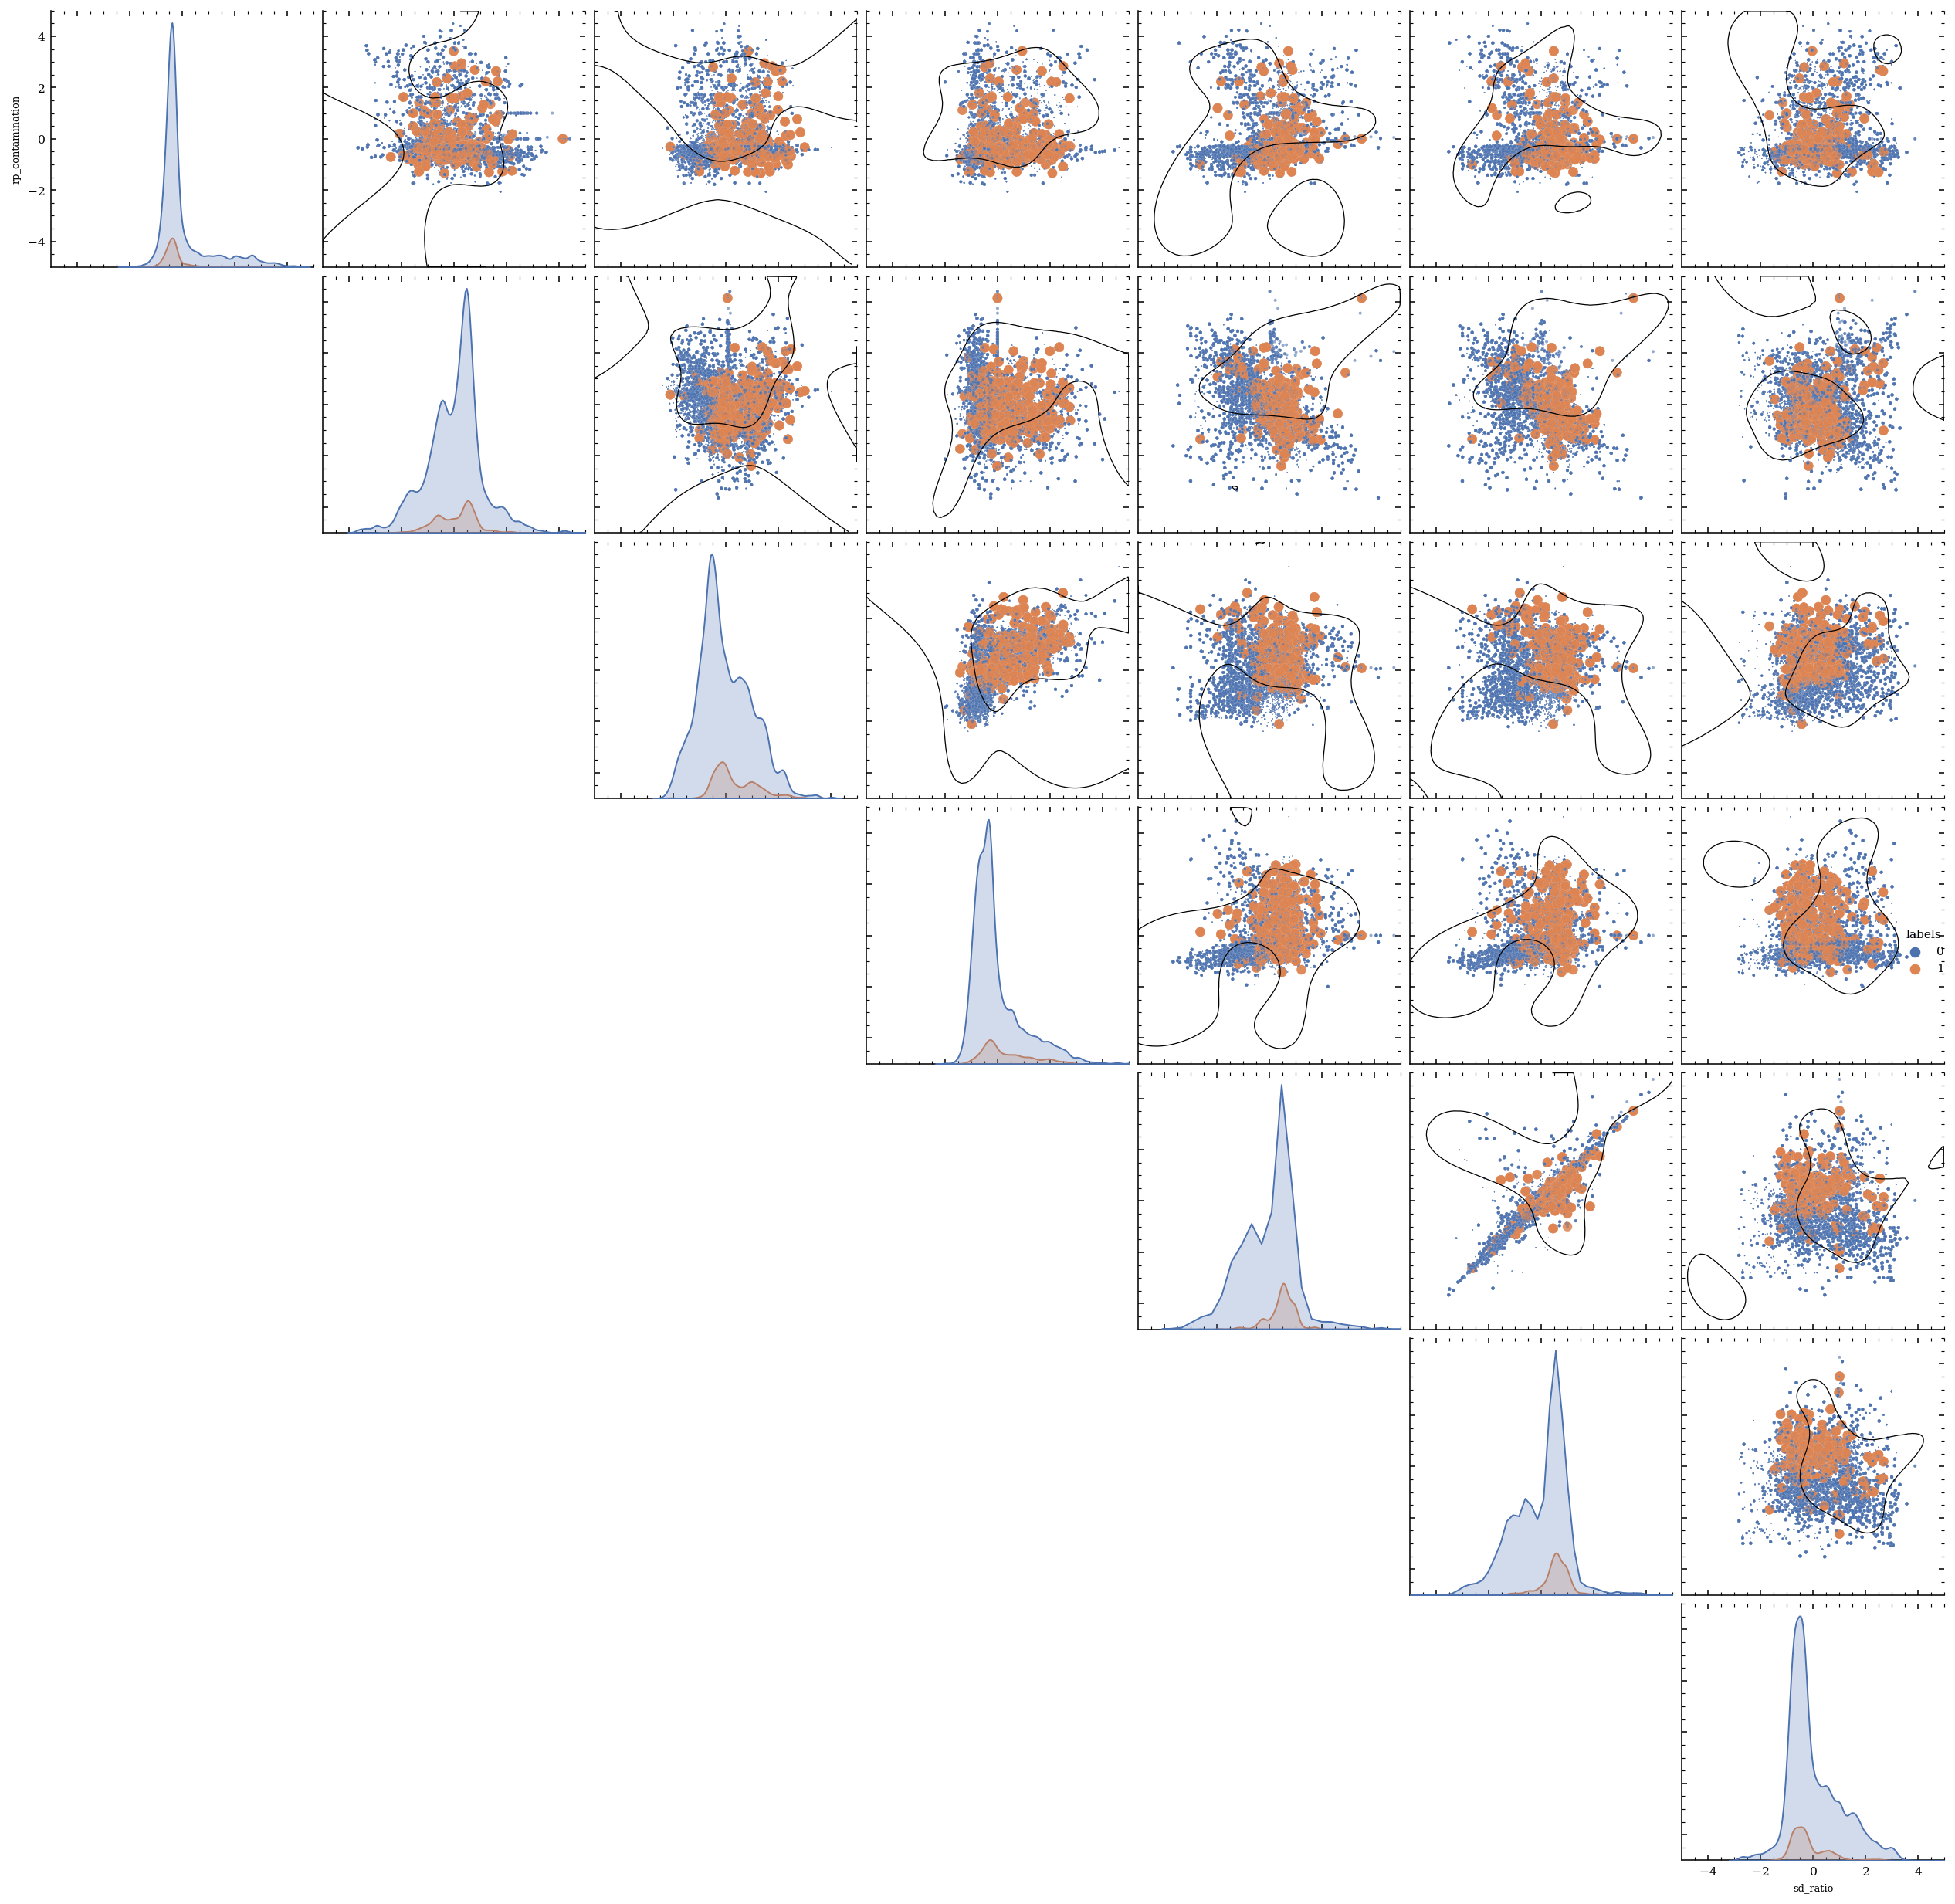

In [151]:
g = sns.pairplot(df,hue='labels', plot_kws=dict(alpha=.6, s = 8 * true_weights), palette = sns.color_palette("deep"))
g.set(xlim=(-5,5), ylim = (-5,5))
for i in range(7) : 
    for j in range(7) : 
        if i > j : 
            g.axes[i,j].set_visible(False)
        elif i< j :  
            
            clf2 = svm.SVC(gamma = .1,class_weight = 'balanced', C = 25)
            clf2.fit(np.concatenate(X_cluster)[:,[i, j]], np.concatenate(y_cluster), sample_weight = np.concatenate(y_weights))

            contour = g.axes[i,j].tricontour(*X.T[[1,2]], clf2.decision_function(X[:,[1,2]]), levels = [0], linewidths = .65, colors = 'k')

plt.savefig('./CR/figure/pairplot.png', dpi = 300)

In [303]:
clf2.class_weight_

array([0.55304398, 5.21307038])

In [137]:
X = np.random.uniform((-5, -5,-5, -5, -5, -5, -5),(5,5, 5,5, 5, 5, 5),(10000,7))

In [225]:
clf2.decision_function(X).shape

(10000,)

In [141]:
X.T[[1,2]].shape

(2, 10000)

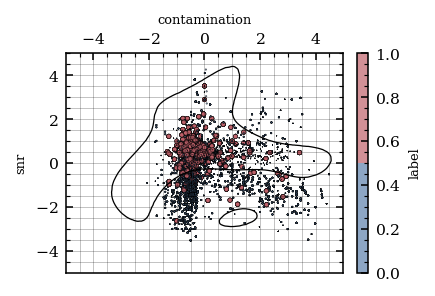

In [142]:
fig, ax = plt.subplots(figsize = (3,2))
contour = ax.tricontour(*X.T[[1,2]], clf2.decision_function(X[:,[1,2]]), levels = [0], linewidths = .65, colors = 'k')

scat = ax.scatter(np.concatenate(X_cluster)[:,0], np.concatenate(X_cluster)[:,5],s = true_weights,  c = np.concatenate(y_cluster), cmap = cmap1.resampled(2), ec = 'k', linewidth = .3, alpha = .7)
ax.set_ylim(-5, 5)
ax.set_xlabel('contamination') 
ax.set_ylabel('snr')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
ax.grid(which='both', alpha=.3)
plt.colorbar(scat, ax = ax, label = 'label')
# plt.colorbar(contour, ax = ax, label = 'decision function', orientation = 'horizontal' ,extendrect = False)
# plt.savefig("/media/andrea/Crucial X6/Master/IMEX/CR/figure/decision_function_working_9.png", dpi = 300, bbox_inches='tight')

In [230]:
x_pca.shape

(40443, 2)

In [124]:
from sklearn.decomposition import PCA

(-5.0, 5.0)

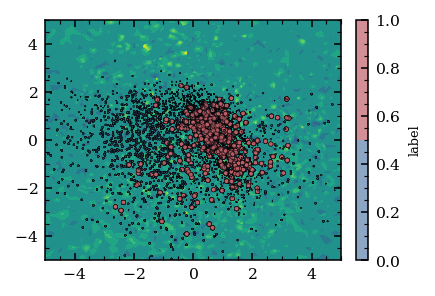

In [125]:
fig, ax = plt.subplots(figsize = (3,2))
X = np.random.uniform((-5, -5,-5, -5, -5, -5, -5),(5,5, 5,5, 5, 5, 5),(10000,7))
pca = PCA(n_components=2)
x_pca = pca.fit_transform(np.concatenate(X_cluster))
x_dec_pca  = pca.transform(X)

contour = ax.tricontourf(*x_dec_pca.T,clf.best_estimator_.decision_function(X), levels = 10)
scat = ax.scatter(*x_pca.T,s = true_weights,  c = np.concatenate(y_cluster), cmap = cmap1.resampled(2), ec = 'k', linewidth = .3, alpha = .7)
plt.colorbar(scat, ax = ax, label = 'label')
ax.set_ylim(-5, 5)
ax.set_xlim(-5, 5)


In [208]:
clf2.score(np.concatenate(X_cluster), np.concatenate(y_cluster), sample_weight = (true_weights/ true_weights.max()))

0.8836451412418797

In [105]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':np.linspace(10,25, 5), 'gamma':np.linspace(1e-3,1e-1, 10)}
svc= svm.SVC(class_weight = 'balanced')
clf = GridSearchCV(svc, parameters, n_jobs=-1, verbose=2, cv = 2)
clf.fit(np.concatenate(X_cluster), np.concatenate(y_cluster), sample_weight = np.concatenate(y_weights))


Fitting 2 folds for each of 50 candidates, totalling 100 fits


[CV] END ................................C=10.0, gamma=0.034; total time= 1.4min
[CV] END .................C=10.0, gamma=0.023000000000000003; total time= 1.4min
[CV] END ................................C=10.0, gamma=0.034; total time= 1.5min
[CV] END .................C=10.0, gamma=0.023000000000000003; total time= 1.5min
[CV] END ................................C=10.0, gamma=0.012; total time= 1.5min
[CV] END ................................C=10.0, gamma=0.012; total time= 1.6min
[CV] END ................................C=10.0, gamma=0.001; total time= 1.6min
[CV] END ................................C=10.0, gamma=0.001; total time= 1.8min
[CV] END ..................C=10.0, gamma=0.05600000000000001; total time= 1.4min
[CV] END .................C=10.0, gamma=0.045000000000000005; total time= 1.5min
[CV] END ..................C=10.0, gamma=0.05600000000000001; total time= 1.4min
[CV] END .................C=10.0, gamma=0.045000000000000005; total time= 1.5min
[CV] END ..................C

GridSearchCV(cv=2, estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': array([10.  , 13.75, 17.5 , 21.25, 25.  ]),
                         'gamma': array([0.001, 0.012, 0.023, 0.034, 0.045, 0.056, 0.067, 0.078, 0.089,
       0.1  ])},
             verbose=2)

In [157]:
a = clf.cv_results_['mean_test_score']

array([0.42385583, 0.42613061, 0.42966639, 0.43186702, 0.43448794,
       0.47217066, 0.47320922, 0.47330808, 0.47449493, 0.474767  ,
       0.47879741, 0.48070138, 0.48186349, 0.48386628, 0.48715489,
       0.4893555 , 0.48967698, 0.492199  , 0.49227317, 0.49308907,
       0.49383085, 0.49462216, 0.49726778, 0.49731722, 0.49877605,
       0.5000123 , 0.50196569, 0.50639167, 0.50762798, 0.50930936,
       0.51244959, 0.51348812, 0.51536733, 0.51662836, 0.52098013,
       0.52231534, 0.52429341, 0.5243676 , 0.52721113, 0.53287337,
       0.53410966, 0.53561794, 0.53648336, 0.53865923, 0.54439569,
       0.54526107, 0.55018159, 0.55156625, 0.55900887, 0.56412719])

In [120]:
clf.best_estimator_.score(np.concatenate(X_cluster), np.concatenate(y_cluster), sample_weight = (true_weights/ true_weights.max()))

0.9484191139218773

In [127]:
clf.best_estimator_

SVC(C=25.0, class_weight='balanced', gamma=0.1)

In [115]:
mesh = np.meshgrid(np.linspace(10,25, 5), np.linspace(1e-3,1e-1, 10))

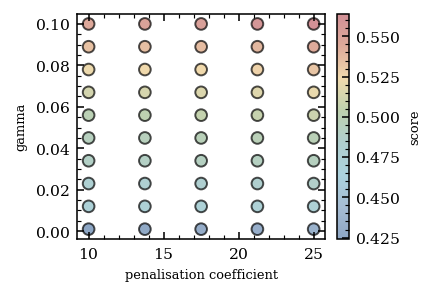

In [162]:
fig, ax = plt.subplots(figsize = (3,2))
scat = ax.scatter(*mesh, c = clf.cv_results_['mean_test_score'], cmap = cmap1, ec = 'k', linewidth = 1, alpha = .7)
plt.colorbar(scat, ax = ax, label = 'score')
ax.set_xlabel('penalisation coefficient')
ax.set_ylabel('gamma')
plt.savefig('../CR/figure/grid_search.png', dpi = 300)


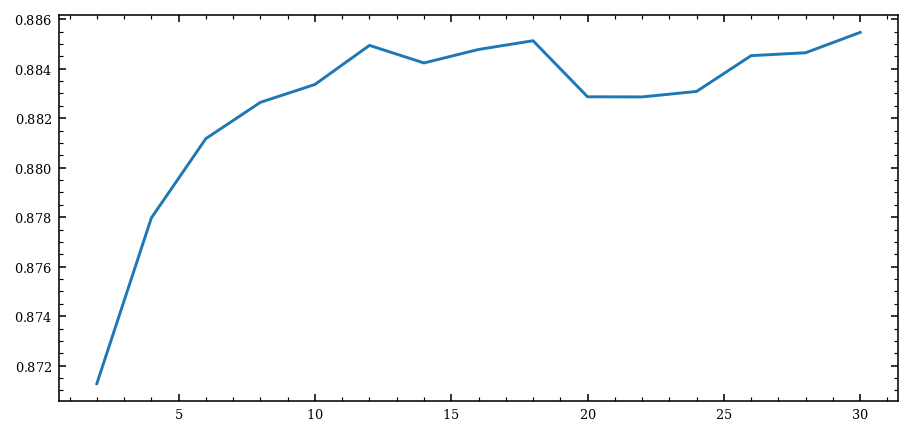

In [143]:
fig, ax = plt.subplots()
ax.plot(C, score)

In [ ]:
score2 = [.872, .878, .882, .884, .885, .886, .887, .887, .884, .887, .887, .885, .887, .887, .887]
std = np.random.uniform(0,.01, len(score2))


(28009,)


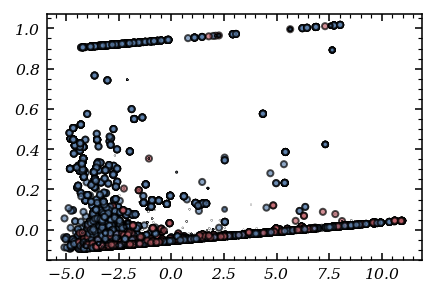

In [74]:
fig, ax = plt.subplots(figsize = (3,2))
xc = pca.fit_transform(np.concatenate(X_cluster))
print(np.concatenate(y_weights).shape)
scat = ax.scatter(xc[:,0],xc[:,1],s = 10 * np.concatenate(y_weights), c = np.concatenate(y_cluster), cmap = cmap1.resampled(2), ec = 'k', alpha = .7)


In [ ]:
def new_score()

In [313]:
clf2.score(np.concatenate(X_cluster), np.concatenate(y_cluster), sample_weight = np.concatenate(y_weights))

0.4982410760098582